In [238]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(context='notebook', style='darkgrid')
plt.rcParams['figure.figsize'] = (12,6) #plt.figure(figsize=(12,6))

# Import Datasets and Checking Size

Use Training dataset for training and testing (Test_set.xlsx doesn't contain price, thus cannot be used for validation)

In [239]:
train = pd.read_excel('Data_Train.xlsx')
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [240]:
test = pd.read_excel('Test_set.xlsx')
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


## Basic EDA

In [241]:
print(f'Train Size: {train.shape}')
print(f'Test  Size: {test.shape}')

Train Size: (10683, 11)
Test  Size: (2671, 10)


In [242]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [243]:
train[train.isna().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


Dropping Null rows

In [244]:
train.dropna(inplace=True)

In [245]:
test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

### Splitting data into df_train and df_test

In [246]:
from sklearn.model_selection import train_test_split

df_train, df_test, y_train, y_test = train_test_split(train.drop(columns='Price'), train['Price'], test_size=0.2, random_state=42)

In [247]:
print(f'Train set size: {df_train.shape}, Train target variable size: {y_train.shape[0]}')
print(f'Test set size: {df_test.shape}, Test target variable size: {y_test.shape[0]}')

Train set size: (8545, 10), Train target variable size: 8545
Test set size: (2137, 10), Test target variable size: 2137


In [248]:
df_test.columns, df_train.columns

(Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
        'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
        'Additional_Info'],
       dtype='object'),
 Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
        'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
        'Additional_Info'],
       dtype='object'))

# Feature Engineering

In [249]:
# https://www.codegrepper.com/code-examples/python/pandas+datetime+series+get+day+week+month+year
# df_train['Date_of_Journey'] = pd.to_datetime(df_train['Date_of_Journey'], format='%d/%m/%Y')
# df_train['Date_of_Journey'].dt.dayofweek        # monday=0 sunday=6
# df_train['Date_of_Journey'].dt.day_name()       
# df_train['Date_of_Journey'].dt.month            # Jan=1 Dec=12
# df_train['Date_of_Journey'].dt.month_name()

# df_train['Journey_Date']  = df_train['Date_of_Journey'].apply(lambda x: x.split("/")[0]).astype(int)
# df_train['Journey_Month'] = df_train['Date_of_Journey'].apply(lambda x: x.split("/")[1]).astype(int)

## Exploring Date/Time Columns

In [250]:
drop_cols = []

df_train['Date_of_Journey'] = pd.to_datetime(df_train['Date_of_Journey'], format='%d/%m/%Y')
df_train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
10005,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,08:30,19:15,10h 45m,1 stop,No info
3684,Jet Airways,2019-05-09,Delhi,Cochin,DEL → BOM → COK,11:30,12:35 10 May,25h 5m,1 stop,In-flight meal not included
1034,SpiceJet,2019-04-24,Delhi,Cochin,DEL → MAA → COK,15:45,22:05,6h 20m,1 stop,No info
3909,Multiple carriers,2019-03-21,Delhi,Cochin,DEL → BOM → COK,12:50,01:35 22 Mar,12h 45m,1 stop,No info
3088,Air India,2019-06-24,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 25 Jun,26h,2 stops,No info


In [251]:
df_train['Date_of_Journey'].dt.year.value_counts()

2019    8545
Name: Date_of_Journey, dtype: int64

In [252]:
df_train['Monthday'] = df_train['Date_of_Journey'].dt.day
df_train['Weekday'] = df_train['Date_of_Journey'].dt.dayofweek      # Monday=0 Sunday=6
df_train['Month'] = df_train['Date_of_Journey'].dt.month - 1           # original: Jan=1 Dec=12, after -1: Jan=0 Dec=11

drop_cols.append('Date_of_Journey')

In [253]:
df_train['wkday_sin'] = np.sin(df_train['Weekday']*(2.*np.pi/7))
df_train['wkday_cos'] = np.cos(df_train['Weekday']*(2.*np.pi/7))
df_train['mnth_sin'] = np.sin(df_train['Month']*(2.*np.pi/12))
df_train['mnth_cos'] = np.cos(df_train['Month']*(2.*np.pi/12))

In [254]:
drop_cols.append('Month')
drop_cols.append('Weekday')
df_train.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Monthday,Weekday,Month,wkday_sin,wkday_cos,mnth_sin,mnth_cos
10005,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,08:30,19:15,10h 45m,1 stop,No info,27,0,4,0.000000,1.000000,0.866025,-5.000000e-01
3684,Jet Airways,2019-05-09,Delhi,Cochin,DEL → BOM → COK,11:30,12:35 10 May,25h 5m,1 stop,In-flight meal not included,9,3,4,0.433884,-0.900969,0.866025,-5.000000e-01
1034,SpiceJet,2019-04-24,Delhi,Cochin,DEL → MAA → COK,15:45,22:05,6h 20m,1 stop,No info,24,2,3,0.974928,-0.222521,1.000000,6.123234e-17


In [255]:
def duration_cal(time):
    dur = 0

    if len(time.split()) != 2:
        if time[-1] == 'h':
            return int(time[:-1])
        else:
            return round(int(time[:-1])/60,2)
    
    else:
        dur = dur + int(time.split()[0][:-1]) + round(int(time.split()[1][:-1])/60, 2)
        return dur


In [256]:
df_train['Total_Duration_hrs'] = df_train['Duration'].apply(lambda x: duration_cal(x))

drop_cols.append('Duration')
df_train.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Monthday,Weekday,Month,wkday_sin,wkday_cos,mnth_sin,mnth_cos,Total_Duration_hrs
10005,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,08:30,19:15,10h 45m,1 stop,No info,27,0,4,0.0,1.0,0.866025,-0.5,10.75


In [257]:
def arr_time_cal(time):
    time = time[:5]
    dur = int(time.split(':')[0]) + round(int(time.split(':')[1])/60, 2)

    return dur

In [258]:
df_train['Arr_Time_hrs'] = df_train['Arrival_Time'].apply(lambda x: arr_time_cal(x))

drop_cols.append('Arrival_Time')
df_train.sample(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Monthday,Weekday,Month,wkday_sin,wkday_cos,mnth_sin,mnth_cos,Total_Duration_hrs,Arr_Time_hrs
317,Multiple carriers,2019-06-27,Delhi,Cochin,DEL → BOM → COK,19:00,01:30 28 Jun,6h 30m,1 stop,No info,27,3,5,0.433884,-0.900969,0.5,-0.866025,6.5,1.5


In [259]:
def dep_time_cal(time):
    dur = int(time.split(':')[0]) + round(int(time.split(':')[1])/60, 2)

    return dur

In [260]:
df_train['Dep_Time_hrs'] = df_train['Dep_Time'].apply(lambda x: dep_time_cal(x))

drop_cols.append('Dep_Time')
df_train.sample(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Monthday,Weekday,Month,wkday_sin,wkday_cos,mnth_sin,mnth_cos,Total_Duration_hrs,Arr_Time_hrs,Dep_Time_hrs
3010,Multiple carriers,2019-06-06,Delhi,Cochin,DEL → BOM → COK,11:30,21:00,9h 30m,1 stop,No info,6,3,5,0.433884,-0.900969,0.5,-0.866025,9.5,21.0,11.5


In [261]:
drop_cols

['Date_of_Journey', 'Month', 'Weekday', 'Duration', 'Arrival_Time', 'Dep_Time']

## Exploring Categorical Variables

In [262]:
df_train['Total_Stops'].value_counts()

1 stop      4522
non-stop    2778
2 stops     1203
3 stops       41
4 stops        1
Name: Total_Stops, dtype: int64

In [263]:
df_train['Total_Stops'] = df_train['Total_Stops'].map({'1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4, 'non-stop':0})
drop_cols.append('Route')

df_train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Monthday,Weekday,Month,wkday_sin,wkday_cos,mnth_sin,mnth_cos,Total_Duration_hrs,Arr_Time_hrs,Dep_Time_hrs
10005,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,08:30,19:15,10h 45m,1,No info,27,0,4,0.000000,1.000000,0.866025,-5.000000e-01,10.75,19.25,8.50
3684,Jet Airways,2019-05-09,Delhi,Cochin,DEL → BOM → COK,11:30,12:35 10 May,25h 5m,1,In-flight meal not included,9,3,4,0.433884,-0.900969,0.866025,-5.000000e-01,25.08,12.58,11.50
1034,SpiceJet,2019-04-24,Delhi,Cochin,DEL → MAA → COK,15:45,22:05,6h 20m,1,No info,24,2,3,0.974928,-0.222521,1.000000,6.123234e-17,6.33,22.08,15.75
3909,Multiple carriers,2019-03-21,Delhi,Cochin,DEL → BOM → COK,12:50,01:35 22 Mar,12h 45m,1,No info,21,3,2,0.433884,-0.900969,0.866025,5.000000e-01,12.75,1.58,12.83
3088,Air India,2019-06-24,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 25 Jun,26h,2,No info,24,0,5,0.000000,1.000000,0.500000,-8.660254e-01,26.00,19.25,17.25


In [264]:
df_train['Additional_Info'].value_counts()

No info                         6713
In-flight meal not included     1549
No check-in baggage included     254
1 Long layover                    15
Change airports                    7
No Info                            2
Business class                     2
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [265]:
df_train.groupby(by='Additional_Info').mean()

,Total_Stops,Monthday,Weekday,Month,wkday_sin,wkday_cos,mnth_sin,mnth_cos,Total_Duration_hrs,Arr_Time_hrs,Dep_Time_hrs
Additional_Info,,,,,,,,,,,
1 Long layover,1.000000,2.533333,3.733333,2.200000,-0.404958,-0.774238,0.841624,0.408932,15.411333,15.083333,12.472000
1 Short layover,2.000000,1.000000,4.000000,2.000000,-0.433884,-0.900969,0.866025,0.500000,14.580000,23.420000,8.830000
2 Long layover,2.000000,1.000000,4.000000,2.000000,-0.433884,-0.900969,0.866025,0.500000,26.670000,9.420000,6.750000
Business class,1.000000,1.000000,4.000000,2.000000,-0.433884,-0.900969,0.866025,0.500000,6.170000,11.920000,5.750000
Change airports,2.000000,1.000000,4.000000,2.000000,-0.433884,-0.900969,0.866025,0.500000,16.010000,19.571429,10.414286
In-flight meal not included,0.968367,14.277598,2.826340,3.875403,0.046844,0.006362,0.746584,-0.390564,14.043996,13.568832,13.609400
No Info,1.000000,1.000000,4.000000,2.000000,-0.433884,-0.900969,0.866025,0.500000,4.540000,15.290000,10.750000
No check-in baggage included,0.051181,15.299213,2.956693,3.783465,-0.016626,-0.004771,0.776729,-0.349008,2.455236,10.389882,12.565079
No info,0.820051,13.436020,2.938776,3.667213,0.033375,0.008748,0.766648,-0.292155,10.209468,13.883918,12.719197


In [266]:
df_train['Additional_Info'] = df_train['Additional_Info'].replace({"No info":"No Info", 
                                                                   "No Info":"No Info", 
                                                                   "1 Long layover":"Layover",
                                                                   "1 Short layover":"Layover",
                                                                   "2 Long layover":"Layover"})

In [267]:
df_train['Additional_Info'].value_counts()

No Info                         6715
In-flight meal not included     1549
No check-in baggage included     254
Layover                           17
Change airports                    7
Business class                     2
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [268]:
df_train.sample(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Monthday,Weekday,Month,wkday_sin,wkday_cos,mnth_sin,mnth_cos,Total_Duration_hrs,Arr_Time_hrs,Dep_Time_hrs
4309,SpiceJet,2019-04-01,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,0,No Info,1,0,3,0.000000,1.000000,1.000000,6.123234e-17,2.67,8.58,5.92
466,IndiGo,2019-03-06,Kolkata,Banglore,CCU → BLR,17:15,19:55,2h 40m,0,No Info,6,2,2,0.974928,-0.222521,0.866025,5.000000e-01,2.67,19.92,17.25


In [269]:
df_train.shape, y_train.shape

((8545, 20), (8545,))

In [270]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Monthday', 'Weekday', 'Month', 'wkday_sin',
       'wkday_cos', 'mnth_sin', 'mnth_cos', 'Total_Duration_hrs',
       'Arr_Time_hrs', 'Dep_Time_hrs'],
      dtype='object')

# Preprocessing and Model Selection

In [271]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [272]:
features_cat = ['Airline','Source','Destination','Additional_Info']
features_num = ['Monthday','Total_Duration_hrs','Arr_Time_hrs','Dep_Time_hrs','Total_Stops']

In [273]:
transformer = ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'), features_cat), 
                                              ('RobustScaler', RobustScaler(), features_num)], 
                                               remainder='passthrough', sparse_threshold=0)

In [274]:
print(drop_cols)
df_train.drop(columns=drop_cols,inplace=True)
df_train.head(2)

['Date_of_Journey', 'Month', 'Weekday', 'Duration', 'Arrival_Time', 'Dep_Time', 'Route']


,Airline,Source,Destination,Total_Stops,Additional_Info,Monthday,wkday_sin,wkday_cos,mnth_sin,mnth_cos,Total_Duration_hrs,Arr_Time_hrs,Dep_Time_hrs
10005,Multiple carriers,Delhi,Cochin,1,No Info,27,0.000000,1.000000,0.866025,-0.5,10.75,19.25,8.5
3684,Jet Airways,Delhi,Cochin,1,In-flight meal not included,9,0.433884,-0.900969,0.866025,-0.5,25.08,12.58,11.5


In [275]:
df_train.shape, y_train.shape

((8545, 13), (8545,))

In [276]:
df_train

,Airline,Source,Destination,Total_Stops,Additional_Info,Monthday,wkday_sin,wkday_cos,mnth_sin,mnth_cos,Total_Duration_hrs,Arr_Time_hrs,Dep_Time_hrs
10005,Multiple carriers,Delhi,Cochin,1,No Info,27,0.000000,1.000000,0.866025,-5.000000e-01,10.75,19.25,8.50
3684,Jet Airways,Delhi,Cochin,1,In-flight meal not included,9,0.433884,-0.900969,0.866025,-5.000000e-01,25.08,12.58,11.50
1034,SpiceJet,Delhi,Cochin,1,No Info,24,0.974928,-0.222521,1.000000,6.123234e-17,6.33,22.08,15.75
3909,Multiple carriers,Delhi,Cochin,1,No Info,21,0.433884,-0.900969,0.866025,5.000000e-01,12.75,1.58,12.83
3088,Air India,Delhi,Cochin,2,No Info,24,0.000000,1.000000,0.500000,-8.660254e-01,26.00,19.25,17.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,Jet Airways,Delhi,Cochin,1,No Info,27,0.974928,-0.222521,0.866025,5.000000e-01,19.42,4.42,9.00
5191,Jet Airways,Kolkata,Banglore,1,In-flight meal not included,9,0.433884,-0.900969,0.866025,-5.000000e-01,6.67,20.75,14.08
5390,Multiple carriers,Delhi,Cochin,1,No Info,15,0.974928,-0.222521,0.866025,-5.000000e-01,12.67,1.50,12.83
860,IndiGo,Banglore,New Delhi,0,No Info,3,-0.781831,0.623490,0.866025,5.000000e-01,2.75,3.42,0.67


### Linear Regression

In [277]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

pipe_lr = Pipeline([('preprocessor', transformer), ('Linear Regression', lr)])
pipe_lr.fit(df_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Airline', 'Source',
                                                   'Destination',
                                                   'Additional_Info']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['Monthday',
                                                   'Total_Duration_hrs',
                                                   'Arr_Time_hrs',
                                                   'Dep_Time_hrs',
                                                   'Total_Stops'])])),
                ('Linear Regression', LinearRegression())]

#### Insample Linear Regression Score

In [278]:
pipe_lr.score(df_train,y_train)

0.6945334538230825

### RandomForestRegressor

In [279]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

pipe_rfr = Pipeline([('preprocessor', transformer), ('Random Forest', rfr)])
pipe_rfr.fit(df_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Airline', 'Source',
                                                   'Destination',
                                                   'Additional_Info']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['Monthday',
                                                   'Total_Duration_hrs',
                                                   'Arr_Time_hrs',
                                                   'Dep_Time_hrs',
                                                   'Total_Stops'])])),
                ('Random Forest', RandomForestRegressor())

#### Insample Random Forest Score

In [280]:
pipe_rfr.score(df_train, y_train)

0.9806002419933969

## Test Data

In [281]:
df_test.shape, y_test.shape

((2137, 10), (2137,))

In [282]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
6075,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → IDR → BOM → COK,15:05,01:30 22 May,10h 25m,2 stops,No info
3544,GoAir,3/06/2019,Delhi,Cochin,DEL → BOM → COK,10:35,19:35,9h,1 stop,No info
9291,Vistara,9/05/2019,Kolkata,Banglore,CCU → DEL → BLR,20:20,09:05 10 May,12h 45m,1 stop,No info
5032,IndiGo,24/05/2019,Chennai,Kolkata,MAA → CCU,14:45,17:05,2h 20m,non-stop,No info
2483,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,22:50,04:25 22 May,5h 35m,1 stop,In-flight meal not included
...,...,...,...,...,...,...,...,...,...,...
9797,Multiple carriers,27/06/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
9871,SpiceJet,6/03/2019,Kolkata,Banglore,CCU → BLR,17:15,19:45,2h 30m,non-stop,No info
10063,Air Asia,21/04/2019,Delhi,Cochin,DEL → BLR → COK,07:55,22:25,14h 30m,1 stop,No info
8802,Jet Airways,24/03/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,23:25,16h 55m,1 stop,In-flight meal not included


In [283]:
df_test['Date_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey'], format='%d/%m/%Y')

df_test['Monthday'] = df_test['Date_of_Journey'].dt.day
df_test['Weekday'] = df_test['Date_of_Journey'].dt.dayofweek      # Monday=0 Sunday=6
df_test['Month'] = df_test['Date_of_Journey'].dt.month - 1           # original: Jan=1 Dec=12, after -1: Jan=0 Dec=11

df_test['wkday_sin'] = np.sin(df_test['Weekday']*(2.*np.pi/7))
df_test['wkday_cos'] = np.cos(df_test['Weekday']*(2.*np.pi/7))
df_test['mnth_sin'] = np.sin(df_test['Month']*(2.*np.pi/12))
df_test['mnth_cos'] = np.cos(df_test['Month']*(2.*np.pi/12))

df_test['Total_Duration_hrs'] = df_test['Duration'].apply(lambda x: duration_cal(x))
df_test['Arr_Time_hrs'] = df_test['Arrival_Time'].apply(lambda x: arr_time_cal(x))
df_test['Dep_Time_hrs'] = df_test['Dep_Time'].apply(lambda x: dep_time_cal(x))

df_test['Total_Stops'] = df_test['Total_Stops'].map({'1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4, 'non-stop':0})

df_test['Additional_Info'] = df_test['Additional_Info'].replace({"No info":"No Info", 
                                                                   "No Info":"No Info", 
                                                                   "1 Long layover":"Layover",
                                                                   "1 Short layover":"Layover",
                                                                   "2 Long layover":"Layover"})


In [284]:
df_test.drop(columns=drop_cols,inplace=True)
df_test.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Monthday,wkday_sin,wkday_cos,mnth_sin,mnth_cos,Total_Duration_hrs,Arr_Time_hrs,Dep_Time_hrs
6075,Multiple carriers,Delhi,Cochin,2,No Info,21,0.781831,0.623490,0.866025,-0.500000,10.42,1.50,15.08
3544,GoAir,Delhi,Cochin,1,No Info,3,0.000000,1.000000,0.500000,-0.866025,9.00,19.58,10.58
9291,Vistara,Kolkata,Banglore,1,No Info,9,0.433884,-0.900969,0.866025,-0.500000,12.75,9.08,20.33


In [285]:
df_test.shape, y_test.shape

((2137, 13), (2137,))

### Linear Regssion on Test Set

In [286]:
pred_lr = pipe_lr.predict(df_test)
pipe_lr.score(df_test,y_test)

0.6912210109865741

LINEAR REGRESSION
----------------------------------------
MAE: 1771.1875292466075
MSE: 6657909.952825222
RMSE: 2580.2926099233828
R2 Score: 0.6912210109865741


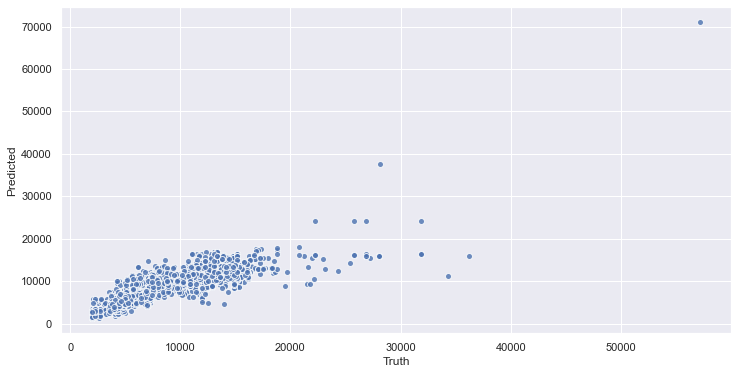

In [287]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

plt.scatter(y_test, pred_lr, alpha=0.8, marker='o', edgecolors='white')
plt.xlabel('Truth')
plt.ylabel('Predicted')

print('LINEAR REGRESSION')
print('----------------------------------------')
print('MAE:', mean_absolute_error(y_test, pred_lr))
print('MSE:', mean_squared_error(y_test, pred_lr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_lr)))
print('R2 Score:', r2_score(y_test,pred_lr))

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

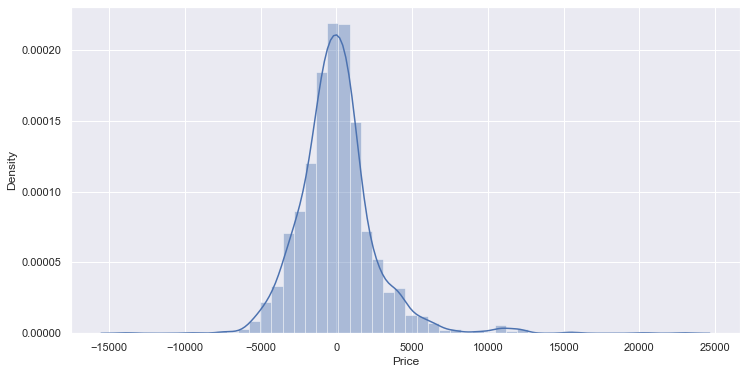

In [288]:
sns.distplot(y_test-pred_lr, kde=True)

In [289]:
pred_lr[:11], y_test[:11]

(array([12957.25,  7543.75,  9448.  ,  3739.75,  9048.75, 11145.  ,
        12050.5 , 10589.25,  8579.  , 12175.75,  3069.  ]),
 6075    16655
 3544     4959
 9291     9187
 5032     3858
 2483    12898
 9894    10529
 346     16079
 6365     7229
 7624    10844
 3393    16289
 5412     3943
 Name: Price, dtype: int64)

### Random Forest Regressor on Test Set

In [290]:
pred_rfr = pipe_rfr.predict(df_test)
pipe_rfr.score(df_test,y_test)

0.9017692136559227

In [291]:
df_test.shape,y_test.shape

((2137, 13), (2137,))

RANDOM FOREST CLASSIFIER
----------------------------------------
MAE: 638.9279619723203
MSE: 2118057.7479176987
RMSE: 1455.354852919967
R2 Score: 0.9017692136559227


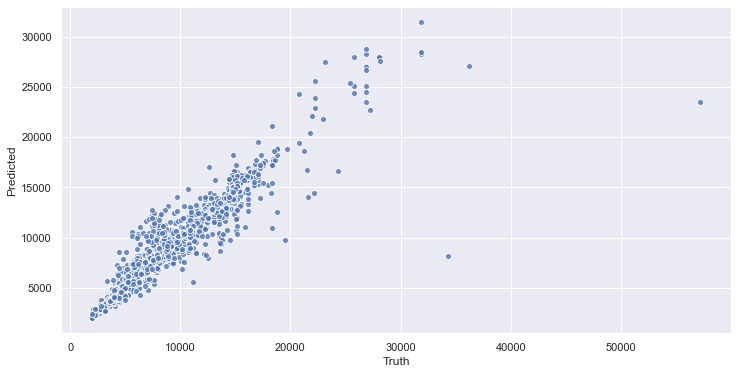

In [292]:
plt.scatter(y_test, pred_rfr, alpha=0.8, marker='o', edgecolors='white')
plt.xlabel('Truth')
plt.ylabel('Predicted')

print('RANDOM FOREST CLASSIFIER')
print('----------------------------------------')
print('MAE:', mean_absolute_error(y_test, pred_rfr))
print('MSE:', mean_squared_error(y_test, pred_rfr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_rfr)))
print('R2 Score:', r2_score(y_test,pred_rfr))

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

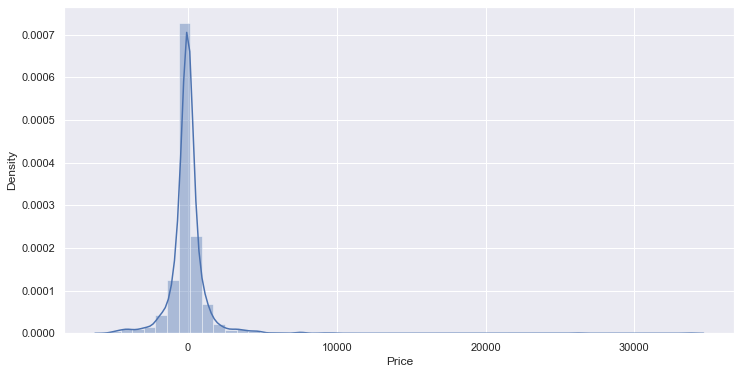

In [293]:
sns.distplot(y_test-pred_rfr, kde=True)

In [294]:
pred_rfr[:11], y_test[:11]

(array([16792.75      ,  5331.5       ,  8890.55      ,  3612.66      ,
        12808.17      , 10169.07683333, 16022.25      ,  7236.87      ,
         9805.07      , 16282.31      ,  3955.66      ]),
 6075    16655
 3544     4959
 9291     9187
 5032     3858
 2483    12898
 9894    10529
 346     16079
 6365     7229
 7624    10844
 3393    16289
 5412     3943
 Name: Price, dtype: int64)

In [295]:
df_predictions = pd.DataFrame({'Truth':y_test,'Pred_LR':pred_lr,'Pred_RFR':pred_rfr})
df_predictions['LR_Residual'] = np.abs(df_predictions['Truth']-df_predictions['Pred_LR'])
df_predictions['RFR_Residual'] = np.abs(df_predictions['Truth']-df_predictions['Pred_RFR'])
df_predictions.reset_index(drop=True, inplace=True)

In [296]:
df_predictions

,Truth,Pred_LR,Pred_RFR,LR_Residual,RFR_Residual
0,16655,12957.25,16792.750000,3697.75,137.750000
1,4959,7543.75,5331.500000,2584.75,372.500000
2,9187,9448.00,8890.550000,261.00,296.450000
3,3858,3739.75,3612.660000,118.25,245.340000
4,12898,9048.75,12808.170000,3849.25,89.830000
...,...,...,...,...,...
2132,7408,9840.75,12719.906667,2432.75,5311.906667
2133,4622,5440.25,4638.780000,818.25,16.780000
2134,7452,6847.25,6847.220000,604.75,604.780000
2135,8824,10060.00,9135.830000,1236.00,311.830000


In [1]:
#df_predictions[df_predictions.LR_Residual < df_predictions.RFR_Residual].index.values

In [298]:
df_test.iloc[df_predictions[df_predictions.LR_Residual < df_predictions.RFR_Residual].index.values]

,Airline,Source,Destination,Total_Stops,Additional_Info,Monthday,wkday_sin,wkday_cos,mnth_sin,mnth_cos,Total_Duration_hrs,Arr_Time_hrs,Dep_Time_hrs
9291,Vistara,Kolkata,Banglore,1,No Info,9,0.433884,-0.900969,0.866025,-5.000000e-01,12.75,9.08,20.33
5032,IndiGo,Chennai,Kolkata,0,No Info,24,-0.433884,-0.900969,0.866025,-5.000000e-01,2.33,17.08,14.75
9259,Jet Airways,Banglore,New Delhi,1,No Info,6,0.974928,-0.222521,0.866025,5.000000e-01,18.17,8.25,14.08
3422,Vistara,Banglore,New Delhi,0,No Info,24,-0.781831,0.623490,0.866025,5.000000e-01,2.67,14.67,12.00
2848,IndiGo,Delhi,Cochin,0,No Info,18,0.000000,1.000000,0.866025,5.000000e-01,3.08,17.58,14.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4394,Jet Airways,Delhi,Cochin,1,In-flight meal not included,27,0.000000,1.000000,0.866025,-5.000000e-01,7.50,19.00,11.50
9680,Multiple carriers,Delhi,Cochin,1,No Info,15,-0.974928,-0.222521,0.500000,-8.660254e-01,13.00,21.00,8.00
9797,Multiple carriers,Delhi,Cochin,1,No Info,27,0.433884,-0.900969,0.500000,-8.660254e-01,13.00,21.00,8.00
10063,Air Asia,Delhi,Cochin,1,No Info,21,-0.781831,0.623490,1.000000,6.123234e-17,14.50,22.42,7.92


In [299]:
df_predictions[df_predictions.LR_Residual < df_predictions.RFR_Residual]

,Truth,Pred_LR,Pred_RFR,LR_Residual,RFR_Residual
2,9187,9448.00,8890.550000,261.00,296.450000
3,3858,3739.75,3612.660000,118.25,245.340000
12,14815,15489.00,16631.240000,674.00,1816.240000
22,7608,8040.00,5377.265000,432.00,2230.735000
25,5406,5378.25,5637.010000,27.75,231.010000
...,...,...,...,...,...
2128,9732,8498.50,12625.060000,1233.50,2893.060000
2131,7408,10952.25,12012.448333,3544.25,4604.448333
2132,7408,9840.75,12719.906667,2432.75,5311.906667
2134,7452,6847.25,6847.220000,604.75,604.780000


# Rough

In [300]:
df_train.shape, y_train.shape

((8545, 13), (8545,))

In [301]:
df_test.shape, y_test.shape

((2137, 13), (2137,))

In [302]:
df_train.isna().sum()

Airline               0
Source                0
Destination           0
Total_Stops           0
Additional_Info       0
Monthday              0
wkday_sin             0
wkday_cos             0
mnth_sin              0
mnth_cos              0
Total_Duration_hrs    0
Arr_Time_hrs          0
Dep_Time_hrs          0
dtype: int64

In [303]:
df_test.isna().sum()

Airline               0
Source                0
Destination           0
Total_Stops           0
Additional_Info       0
Monthday              0
wkday_sin             0
wkday_cos             0
mnth_sin              0
mnth_cos              0
Total_Duration_hrs    0
Arr_Time_hrs          0
Dep_Time_hrs          0
dtype: int64

In [304]:
final_ind_var = pd.concat([df_train, df_test])
final_tar_var = pd.concat([y_train, y_test])

In [305]:
final_ind_var.isna().sum()

Airline               0
Source                0
Destination           0
Total_Stops           0
Additional_Info       0
Monthday              0
wkday_sin             0
wkday_cos             0
mnth_sin              0
mnth_cos              0
Total_Duration_hrs    0
Arr_Time_hrs          0
Dep_Time_hrs          0
dtype: int64

In [306]:
p1 = transformer.fit_transform(final_ind_var)
rnd_reg = RandomForestRegressor()

In [307]:
from sklearn.model_selection import cross_val_score

cross_val_score(rnd_reg, p1, final_tar_var, cv = 5)

array([0.89671564, 0.88838464, 0.88712681, 0.88598368, 0.8996434 ])

In [308]:
arr = cross_val_score(rnd_reg, p1, final_tar_var, cv = 7)

In [309]:
arr.mean()

0.8924289790407391

In [310]:
# there is some issue woth OneHotEncoder, ColumnTransformer and cross_val_score working togther in a pipeline
# https://github.com/feature-engine/feature_engine/issues/368#issuecomment-1026315846

In [311]:
cross_val_score(pipe_rfr, df_test, y_test, cv=5)

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 90, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)

array([0.86430352, 0.85992558,        nan, 0.85586228, 0.85621391])